# Session 0: Preliminaries with Python/Notebook
<p class="lead">
Parag K. Mital<br />
<a href="https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow/info">Creative Applications of Deep Learning w/ Tensorflow</a><br />
<a href="https://www.kadenze.com/partners/kadenze-academy">Kadenze Academy</a><br />
<a href="https://twitter.com/hashtag/CADL">#CADL</a>
</p>

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<a name="learning-goals"></a>
# Learning Goals

* Install and run Jupyter Notebook with the Tensorflow library
* Learn to create a dataset of images using `os.listdir` and `plt.imread`
* Understand how images are represented when using float or uint8
* Learn how to crop and resize images to a standard size.

# Table of Contents
<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Introduction](#introduction)
- [Using Notebook](#using-notebook)
    - [Cells](#cells)
    - [Kernel](#kernel)
    - [Importing Libraries](#importing-libraries)
- [Loading Data](#loading-data)
    - [Structuring data as folders](#structuring-data-as-folders)
    - [Using the `os` library to get data](#using-the-os-library-to-get-data)
    - [Loading an image](#loading-an-image)
    - [RGB Image Representation](#rgb-image-representation)
    - [Understanding data types and ranges \(uint8, float32\)](#understanding-data-types-and-ranges-uint8-float32)
    - [Visualizing your data as images](#visualizing-your-data-as-images)
- [Image Manipulation](#image-manipulation)
    - [Cropping images](#cropping-images)
    - [Resizing images](#resizing-images)
    - [Cropping/Resizing Images](#croppingresizing-images)
    - [The Batch Dimension](#the-batch-dimension)
- [Conclusion](#conclusion)

<!-- /MarkdownTOC -->

<a name="introduction"></a>
# Introduction

This preliminary session will cover the basics of working with image data in Python, and creating an image dataset.  Please make sure you are running at least Python 3.4 and have Tensorflow 0.9.0 or higher installed.  If you are unsure of how to do this, please make sure you have followed the [installation instructions](../README.md#installation-preliminaries).  We'll also cover loading images from a directory, resizing and cropping images, and changing an image datatype from unsigned int to float32.  If you feel comfortable with all of this, please feel free to skip straight to Session 1.  Otherwise, launch `jupyter notebook` and make sure you are reading the `session-0.ipynb` file. 

<a name="using-notebook"></a>
# Using Notebook

*Make sure you have launched `jupyter notebook` and are reading the `session-0.ipynb` file*.  If you are unsure of how to do this, please make sure you follow the [installation instructions](../README.md#installation-preliminaries).  This will allow you to interact with the contents and run the code using an interactive python kernel!

<a name="cells"></a>
## Cells

After launching this notebook, try running/executing the next cell by pressing shift-enter on it.

In [1]:
4*2

8

Now press 'a' or 'b' to create new cells.  You can also use the toolbar to create new cells.  You can also use the arrow keys to move up and down.

<a name="kernel"></a>
## Kernel

Note the numbers on each of the cells inside the brackets, after "running" the cell.  These denote the current execution count of your python "kernel".  Think of the kernel as another machine within your computer that understands Python and interprets what you write as code into executions that the processor can understand.

<a name="importing-libraries"></a>
## Importing Libraries

When you launch a new notebook, your kernel is a blank state.  It only knows standard python syntax.  Everything else is contained in additional python libraries that you have to explicitly "import" like so:

In [2]:
import os

After exectuing this cell, your kernel will have access to everything inside the `os` library which is a common library for interacting with the operating system.  We'll need to use the import statement for all of the libraries that we include.

<a name="loading-data"></a>
# Loading Data

Let's now move onto something more practical.  We'll learn how to see what files are in a directory, and load any images inside that directory into a variable.

<a name="structuring-data-as-folders"></a>
## Structuring data as folders

With Deep Learning, we'll always need a dataset, or a collection of data.  A lot of it.  We're going to create our dataset by putting a bunch of images inside a directory. Then, whenever we want to load the dataset, we will tell python to find all the images inside the directory and load them.  Python lets us very easily crawl through a directory and grab each file.  Let's have a look at how to do this.

<a name="using-the-os-library-to-get-data"></a>
## Using the `os` library to get data

We'll practice with a very large dataset called Celeb Net.  This dataset has about 200,000 images of celebrities.  The researchers also provide a version of the dataset which has every single face cropped and aligned so that each face is in the middle!  We'll be using this aligned dataset.  To read more about the dataset or to download it, follow the link here:

http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

For now, we're not going to be using the entire dataset but just a subset of it.  Run the following cell which will download the first 10 images for you:

In [5]:
# Load the os library
import os

# Load the request module
import urllib.request

if not os.path.exists('img_align_celeba'):
    
    # Create a directory
    os.mkdir('img_align_celeba')

    # Now perform the following 10 times:
    for img_i in range(1, 11):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
else:
    print('Celeb Net dataset already downloaded')

Celeb Net dataset already downloaded


Using the `os` package, we can list an entire directory.  The documentation or docstring, says that `listdir` takes one parameter, `path`:

In [6]:
help(os.listdir)

Help on built-in function listdir in module posix:

listdir(path=None)
    Return a list containing the names of the files in the directory.
    
    path can be specified as either str or bytes.  If path is bytes,
      the filenames returned will also be bytes; in all other circumstances
      the filenames returned will be str.
    If path is None, uses the path='.'.
    On some platforms, path may also be specified as an open file descriptor;\
      the file descriptor must refer to a directory.
      If this functionality is unavailable, using it raises NotImplementedError.
    
    The list is in arbitrary order.  It does not include the special
    entries '.' and '..' even if they are present in the directory.



This is the location of the directory we need to list.  Let's try this with the directory of images we just downloaded:

In [7]:
files = os.listdir('img_align_celeba')

We can also specify to include only certain files like so:

In [8]:
[file_i for file_i in os.listdir('img_align_celeba') if '.jpg' in file_i]

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg']

or even:

In [9]:
[file_i for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i and '00000' in file_i]

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg']

We could also combine file types if we happened to have multiple types:

In [10]:
[file_i for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i or '.png' in file_i or '.jpeg' in file_i]

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg']

Let's set this list to a variable, so we can perform further actions on it:

In [11]:
files = [file_i
         for file_i in os.listdir('img_align_celeba')
         if file_i.endswith('.jpg')]

And now we can index that list using the square brackets:

In [12]:
print(files[0])
print(files[1])

000001.jpg
000002.jpg


We can even go in the reverse direction, which wraps around to the end of the list:

In [13]:
print(files[-1])
print(files[-2])

000010.jpg
000009.jpg


<a name="loading-an-image"></a>
## Loading an image

`matplotlib` is an incredibly powerful python library which will let us play with visualization and loading of image data.  We can import it like so:

In [14]:
import matplotlib.pyplot as plt

Now we can refer to the entire module by just using `plt` instead of `matplotlib.pyplot` every time.  This is pretty common practice.

We'll now tell matplotlib to "inline" plots using an ipython magic function:

In [15]:
%matplotlib inline

This isn't python, so won't work inside of any python script files.  This only works inside notebook.  What this is saying is that whenever we plot something using matplotlib, put the plots directly into the notebook, instead of using a window popup, which is the default behavior.  This is something that makes notebook really useful for teaching purposes, as it allows us to keep all of our images/code in one document.

Have a look at the library by using `plt`:

In [16]:
# help(plt)
# plt.<tab>

`plt` contains a very useful function for loading images:

In [17]:
plt.imread?

Here we see that it actually returns a variable which requires us to use another library, `NumPy`.  NumPy makes working with numerical data *a lot* easier.  Let's import it as well:

In [18]:
import numpy as np
# help(np)
# np.<tab>

Let's try loading the first image in our dataset:

We have a list of filenames, and we know where they are.  But we need to combine the path to the file and the filename itself.  If we try and do this:

In [19]:
# img = plt.imread(files[0])
# outputs: FileNotFoundError

`plt.imread` will not know where that file is.  We can tell it where to find the file by using os.path.join:

In [20]:
print(os.path.join('img_align_celeba/', files[0]))
plt.imread(os.path.join('img_align_celeba/', files[0]))

img_align_celeba/000001.jpg


array([[[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [247, 226, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [249, 228, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [250, 231, 227],
        [255, 239, 223],
        [255, 239, 223]],

       ..., 
       [[140,  74,  26],
        [116,  48,   1],
        [146,  78,  33],
        ..., 
        [122,  55,  28],
        [122,  56,  30],
        [122,  56,  30]],

       [[130,  62,  15],
        [138,  70,  23],
        [166,  98,  53],
        ..., 
        [118,  49,  20],
        [118,  51,  24],
        [118,  51,  24]],

       [[168, 100,  53],
        [204, 136,  89],
        [245, 177, 132],
        ..., 
        [118,  49,  20],
        [120,  50,  24],
        [120,  50,

Now we get a bunch of numbers!  I'd rather not have to keep prepending the path to my files, so I can create the list of files like so:

In [21]:
files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]

Let's set this to a variable, `img`, and inspect a bit further what's going on:

In [22]:
img = plt.imread(files[0])
# img.<tab>

<a name="rgb-image-representation"></a>
## RGB Image Representation

It turns out that all of these numbers are capable of describing an image.  We can use the function `imshow` to see this:

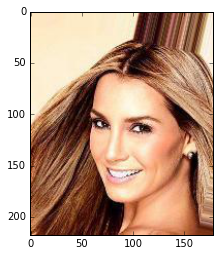

In [23]:
img = plt.imread(files[0])
plt.imshow(img)

Let's break this data down a bit more.  We can see the dimensions of the data using the `shape` accessor:

In [24]:
img.shape
# outputs: (218, 178, 3)

(218, 178, 3)

This means that the image has 218 rows, 178 columns, and 3 color channels corresponding to the Red, Green, and Blue channels of the image, or RGB.  Let's try looking at just one of the color channels.  We can use the square brackets just like when we tried to access elements of our list:

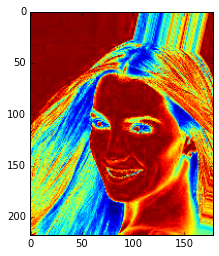

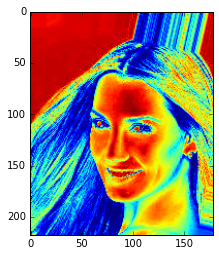

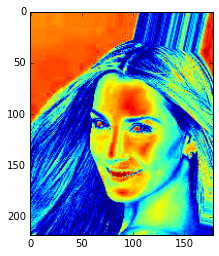

In [25]:
plt.figure()
plt.imshow(img[:, :, 0])
plt.figure()
plt.imshow(img[:, :, 1])
plt.figure()
plt.imshow(img[:, :, 2])

We use the special colon operator to say take every value in this dimension.  This is saying, give me every row, every column, and the 0th dimension of the color channels.

What we see now is a heatmap of our image corresponding to each color channel.

<a name="understanding-data-types-and-ranges-uint8-float32"></a>
## Understanding data types and ranges (uint8, float32)

Let's take a look at the range of values of our image:

In [26]:
np.min(img), np.max(img)

(0, 255)

The numbers are all between 0 to 255.  What a strange number you might be thinking.  Unless you are one of 10 types of people in this world, those that understand binary and those that don't.  Don't worry if you're not.  You are likely better off.

256 values is how much information we can stick into a byte.  We measure a byte using bits, and each byte takes up 8 bits.  Each bit can be either 0 or 1.  When we stack up 8 bits, or 10000000 in binary, equivalent to 2 to the 8th power, we can express up to 256 possible values, giving us our range, 0 to 255.  You can compute any number of bits using powers of two.  2 to the power of 8 is 256.  How many values can you stick in 16 bits (2 bytes)?  Or 32 bits (4 bytes) of information?  Let's ask python:

In [27]:
2**32

4294967296

numpy arrays have a field which will tell us how many bits they are using: `dtype`:

In [28]:
img.dtype

dtype('uint8')

`uint8`:  Let's decompose that:  `unsigned`, `int`, `8`.  That means the values do not have a sign, meaning they are all positive.  They are only integers, meaning no decimal places. And that they are all 8 bits.

Something which is 32-bits of information can express a single value with a range of nearly 4.3 billion different possibilities (2**32).  We'll generally need to work with 32-bit data when working with neural networks.  In order to do that, we can simply ask numpy for the correct data type:

In [29]:
img.astype(np.float32)

array([[[ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        ..., 
        [ 247.,  226.,  225.],
        [ 254.,  238.,  222.],
        [ 254.,  238.,  222.]],

       [[ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        ..., 
        [ 249.,  228.,  225.],
        [ 254.,  238.,  222.],
        [ 254.,  238.,  222.]],

       [[ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        ..., 
        [ 250.,  231.,  227.],
        [ 255.,  239.,  223.],
        [ 255.,  239.,  223.]],

       ..., 
       [[ 140.,   74.,   26.],
        [ 116.,   48.,    1.],
        [ 146.,   78.,   33.],
        ..., 
        [ 122.,   55.,   28.],
        [ 122.,   56.,   30.],
        [ 122.,   56.,   30.]],

       [[ 130.,   62.,   15.],
        [ 138.,   70.,   23.],
        [ 166.,   98.,   53.],
        ..., 
        [ 118.,   49.,   20.],
        [ 118.,   51.,   24.],
        [ 

This is saying, let me see this data as a floating point number, meaning with decimal places, and with 32 bits of precision, rather than the previous data types 8 bits.  This will become important when we start to work with neural networks, as we'll need all of those extra possible values!

<a name="visualizing-your-data-as-images"></a>
## Visualizing your data as images

We've seen how to look at a single image.  But what if we have hundreds, thousands, or millions of images?  Is there a good way of knowing what our dataset looks like without looking at their file names, or opening up each image one at a time?

One way we can do that is to randomly pick an image.

We've already seen how to read the image located at one of our file locations:

In [30]:
plt.imread(files[0])

array([[[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [247, 226, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [249, 228, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [250, 231, 227],
        [255, 239, 223],
        [255, 239, 223]],

       ..., 
       [[140,  74,  26],
        [116,  48,   1],
        [146,  78,  33],
        ..., 
        [122,  55,  28],
        [122,  56,  30],
        [122,  56,  30]],

       [[130,  62,  15],
        [138,  70,  23],
        [166,  98,  53],
        ..., 
        [118,  49,  20],
        [118,  51,  24],
        [118,  51,  24]],

       [[168, 100,  53],
        [204, 136,  89],
        [245, 177, 132],
        ..., 
        [118,  49,  20],
        [120,  50,  24],
        [120,  50,

to pick a random image from our list of files, we can use the numpy random module:

In [31]:
print(np.random.randint(0, len(files)))
print(np.random.randint(0, len(files)))
print(np.random.randint(0, len(files)))

1
5
9


This function will produce random integers between a range of values that we specify.  We say, give us random integers from 0 to the length of files.

We can now use the code we've written before to show a random image from our list of files:

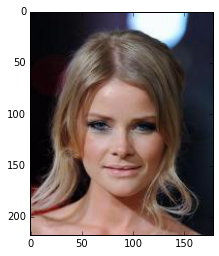

In [32]:
filename = files[np.random.randint(0, len(files))]
img = plt.imread(filename)
plt.imshow(img)

This might be something useful that we'd like to do often.  So we can use a function to help us in the future:

In [33]:
def plot_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)

This function takes one parameter, a variable named filename, which we will have to specify whenever we call it.  That variable is fed into the plt.imread function, and used to load an image.  It is then drawn with plt.imshow.  Let's see how we can use this function definition:

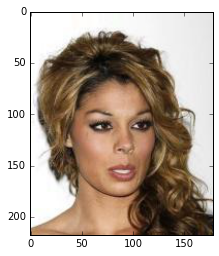

In [35]:
f = files[np.random.randint(0, len(files))]
plot_image(f)

or simply:

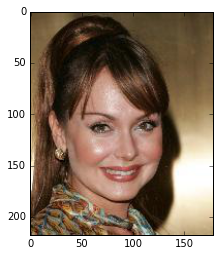

In [36]:
plot_image(files[np.random.randint(0, len(files))])

We use functions to help us reduce the main flow of our code.  It helps to make things clearer, using function names that help describe what is going on.

<a name="image-manipulation"></a>
# Image Manipulation

<a name="cropping-images"></a>
## Cropping images

We're going to create another function which will help us crop the image to a standard size and help us draw every image in our list of files as a grid.

In many applications of deep learning, we will need all of our data to be the same size.  For images this means we'll need to crop the images while trying not to remove any of the important information in it.  Most image datasets that you'll find online will already have a standard size for every image.  But if you're creating your own dataset, you'll need to know how to make all the images the same size.  One way to do this is to find the longest edge of the image, and crop this edge to be as long as the shortest edge of the image.  This will convert the image to a square one, meaning its sides will be the same lengths.  The reason for doing this is that we can then resize this square image to any size we'd like, without distorting the image.  Let's see how we can do that:

In [37]:
def imcrop_tosquare(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1]) // 2
        crop = img[extra:-extra, :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0]) // 2
        crop = img[:, extra:-extra]
    else:
        crop = img
    return crop

There are a few things going on here.  First, we are defining a function which takes as input a single variable.  This variable gets named `img` inside the function, and we enter a set of if/else-if conditionals.  The first branch says, if the rows of `img` are greater than the columns, then set the variable `extra` to their difference and divide by 2.  The `//` notation means to perform an integer division, instead of a floating point division.  So `3 // 2 = 1`, not 1.5.  We need integers for the next line of code which says to set the variable `crop` to `img` starting from `extra` rows, and ending at negative `extra` rows down.  We can't be on row 1.5, only row 1 or 2.  So that's why we need the integer divide there.  Let's say our image was 128 x 96 x 3.  We would have `extra = (128 - 96) // 2`, or 16.  Then we'd start from the 16th row, and end at the -16th row, or the 112th row.  That adds up to 96 rows, exactly the same number of columns as we have.

Let's try another crop function which can crop by an arbitrary amount.  It will take an image and a single factor from 0-1, saying how much of the original image to crop:

In [38]:
def imcrop(img, amt):
    if amt <= 0:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

<a name="resizing-images"></a>
## Resizing images

For resizing the image, we'll make use of a python library, `scipy`.  Let's import the function which we need like so:

In [39]:
#from scipy.<tab>misc import <tab>imresize

Notice that you can hit tab after each step to see what is available. That is really helpful as I never remember what the exact names are.

In [40]:
from scipy.misc import imresize
imresize?

The `imresize` function takes a input image as its first parameter, and a tuple defining the new image shape as rows and then columns.

Let's see how our cropped image can be imresized now:

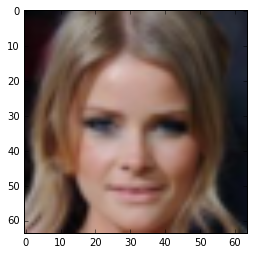

In [41]:
square = imcrop_tosquare(img)
crop = imcrop(square, 0.2)
rsz = imresize(crop, (64, 64))
plt.imshow(rsz)

Great!  To really see what's going on, let's turn off the interpolation like so:

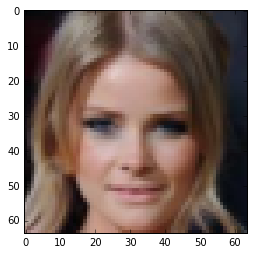

In [42]:
plt.imshow(rsz, interpolation='nearest')

Each one of these squares is called a pixel.  Since this is a color image, each pixel is actually a mixture of 3 values, Red, Green, and Blue.  When we mix those proportions of Red Green and Blue, we get the color shown here.

We can combine the Red Green and Blue channels by taking the mean, or averaging them.  This is equivalent to adding each channel, `R + G + B`, then dividing by the number of color channels, `(R + G + B) / 3`.   We can use the numpy.mean function to help us do this:

(64, 64)


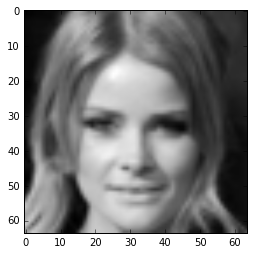

In [43]:
mean_img = np.mean(rsz, axis=2)
print(mean_img.shape)
plt.imshow(mean_img, cmap='gray')

This is an incredibly useful function which we'll revisit later when we try to visualize the mean image of our entire dataset.

<a name="croppingresizing-images"></a>
## Cropping/Resizing Images

We now have functions for cropping an image to a square image, and a function for resizing an image to any desired size.  With these tools, we can begin to create a dataset.  We're going to loop over our 10 files, crop the image to a square to remove the longer edge, and then crop again to remove some of the background, and then finally resize the image to a standard size of 64 x 64 pixels.

In [44]:
imgs = []
for file_i in files:
    img = plt.imread(file_i)
    square = imcrop_tosquare(img)
    crop = imcrop(square, 0.2)
    rsz = imresize(crop, (64, 64))
    imgs.append(rsz)
print(len(imgs))

10


We now have a list containing our images.  Each index of the `imgs` list is another image which we can access using the square brackets:

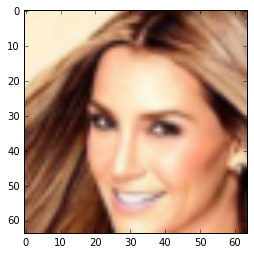

In [45]:
plt.imshow(imgs[0])

Since all of the images are the same size, we can make use of numpy's array instead of a list.

Remember that an image has a shape describing the height, width, channels:

In [46]:
imgs[0].shape

(64, 64, 3)

<a name="the-batch-dimension"></a>
## The Batch Dimension

there is a convention for storing many images in an array using a new dimension called the batch dimension.  The resulting image shape should be:

N x H x W x C

The Number of images, or the batch size, is first; then the Height or number of rows in the image; then the Width or number of cols in the image; then finally the number of channels the image has.  A Color image should have 3 color channels, RGB.  A Grayscale image should just have 1 channel.

We can combine all of our images to look like this in a few ways.  The easiest way is to tell numpy to give us an array of all the images:

In [47]:
data = np.array(imgs)
data.shape

(10, 64, 64, 3)

We could also use the `numpy.concatenate` function, but we have to create a new dimension for each image.  Numpy let's us do this by using a special variable `np.newaxis`

In [48]:
data = np.concatenate([img_i[np.newaxis] for img_i in imgs], axis=0)
data.shape

(10, 64, 64, 3)

The shape is describing batch, or number of images, the height, or rows of the image, the width, or columns of the image, and finally, the number of channels in the image, describing the red, green, and blue colors of the image.

Try to remember at least one of these methods for building up your images as a large array as they can come in handy!

<a name="conclusion"></a>
# Conclusion

You're now ready to move on to the first session where we will work with image datasets and start to compute interesting features of them.  Good luck!